# 3. A Harder Problem: Fashion-MNIST

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from collections import OrderedDict

import torch
from torchvision import datasets, transforms
import utils

import matplotlib.pyplot as plt
import numpy as np
import time

from torch import nn
from torch import optim
import torch.nn.functional as F

In [2]:
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

train_set = datasets.FashionMNIST('Fashion_MNIST_data/', download=True, train=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

test_set = datasets.FashionMNIST('Fashion_MNIST_data/', download=True, train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

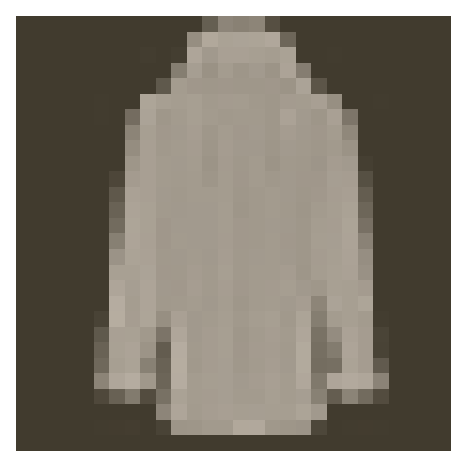

In [3]:
image, label = next(iter(train_loader))
utils.show_image(image[0, :])

In [4]:
input_size = 784
hidden_sizes = [512, 256, 128]
output_size = 10

model = nn.Sequential(OrderedDict([
            ('fully_connected_1', nn.Linear(input_size, hidden_sizes[0])),
            ('relu_1', nn.ReLU()),
            ('fully_connected_2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
            ('relu_2', nn.ReLU()),
            ('fully_connected_3', nn.Linear(hidden_sizes[1], hidden_sizes[2])),
            ('relu_3', nn.ReLU()),
            ('logits', nn.Linear(hidden_sizes[2], output_size)),
        ]))
model

Sequential(
  (fully_connected_1): Linear(in_features=784, out_features=512, bias=True)
  (relu_1): ReLU()
  (fully_connected_2): Linear(in_features=512, out_features=256, bias=True)
  (relu_2): ReLU()
  (fully_connected_3): Linear(in_features=256, out_features=128, bias=True)
  (relu_3): ReLU()
  (logits): Linear(in_features=128, out_features=10, bias=True)
)

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [6]:
epochs = 10
print_every = 50
steps = 0

for epoch in range(1, epochs + 1):
    running_loss = 0
    for images, labels in iter(train_loader):
        steps += 1
        
        images.resize_(images.size()[0], 784)
        
        optimizer.zero_grad()
        
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            print(f'Epoch: {epoch}/{epochs}...\nLoss: {running_loss/print_every}')
            
            running_loss = 0
    

Epoch: 1/10...
Loss: 1.0385724115371704
Epoch: 1/10...
Loss: 0.6453796285390854
Epoch: 1/10...
Loss: 0.5810917395353318
Epoch: 1/10...
Loss: 0.5545432430505752
Epoch: 1/10...
Loss: 0.5185739105939865
Epoch: 1/10...
Loss: 0.5086532181501389
Epoch: 1/10...
Loss: 0.48744061052799226
Epoch: 1/10...
Loss: 0.4764459091424942
Epoch: 1/10...
Loss: 0.45721656441688535
Epoch: 1/10...
Loss: 0.45988845139741896
Epoch: 1/10...
Loss: 0.4471303406357765
Epoch: 1/10...
Loss: 0.45295519769191744
Epoch: 1/10...
Loss: 0.425817064344883
Epoch: 1/10...
Loss: 0.4382962375879288
Epoch: 1/10...
Loss: 0.42165995061397554
Epoch: 1/10...
Loss: 0.4193473234772682
Epoch: 1/10...
Loss: 0.39554483592510226
Epoch: 1/10...
Loss: 0.37703110456466676
Epoch: 2/10...
Loss: 0.09899045556783675
Epoch: 2/10...
Loss: 0.39420618891716
Epoch: 2/10...
Loss: 0.38131344377994536
Epoch: 2/10...
Loss: 0.3757073086500168
Epoch: 2/10...
Loss: 0.3897842279076576
Epoch: 2/10...
Loss: 0.353253663778305
Epoch: 2/10...
Loss: 0.402040372788

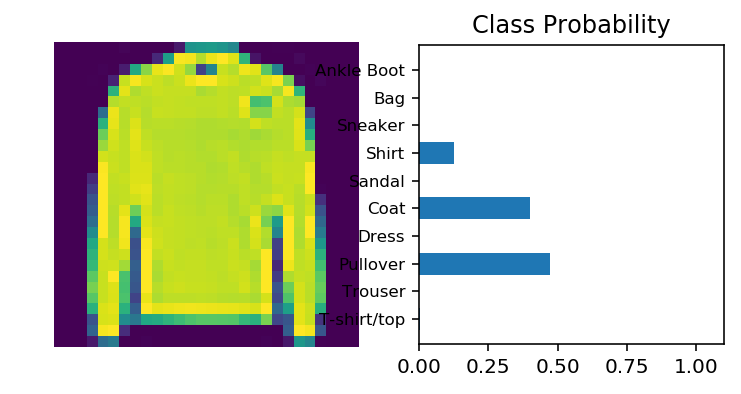

In [7]:
data_iter = iter(test_loader)
images, labels = data_iter.next()

image = images[0]

image = image.resize_(1, 784)

with torch.no_grad():
    logits = model.forward(image)
    
predictions = F.softmax(logits, dim=1)
utils.view_classify(image.view(1, 28, 28), predictions, version='Fashion')